In [72]:
import json
import os
import csv
from PIL import Image, ImageDraw
from IPython.core.display import display

In [73]:
BBOX_CSV_FILE = os.path.join('..', 'data', 'BBox_List_2017.csv')
ORIGINAL = 1024
SCALE = 224
SCALE_FACTOR = SCALE / ORIGINAL

In [74]:
with open('best10.json') as f:
    json_data = json.load(f)
data = {}
for label, images in json_data.items():
    if len(images) > 0:
        data[label] = images

In [75]:
bboxes = {}
with open(BBOX_CSV_FILE) as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader) # skip header
    for row in reader:
        image, _, x, y, w, h, *_ = row
        bboxes[image] = {
            'x': float(x) * SCALE_FACTOR,
            'y': float(y) * SCALE_FACTOR,
            'w': float(w) * SCALE_FACTOR,
            'h': float(h) * SCALE_FACTOR,
        }

Hernia
Pleural_Thickening
Infiltration
Pneumothorax
Effusion
Mass


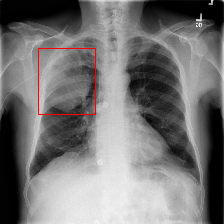

Emphysema
Cardiomegaly


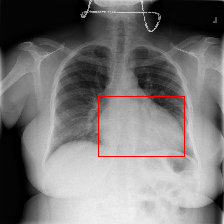

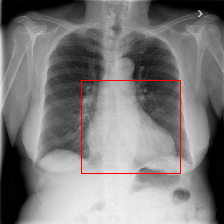

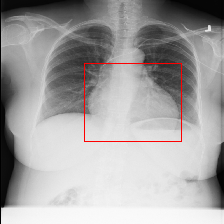

Consolidation
Edema
Atelectasis


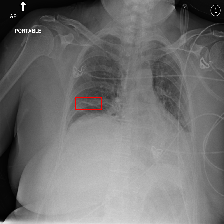

Fibrosis
Nodule


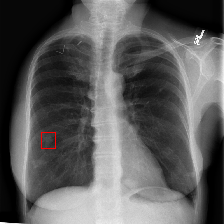

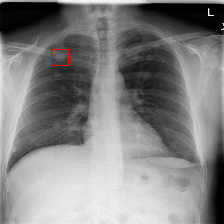

In [77]:
for label, images in data.items():
    print(label)
    for image in images:
        image_name = image['image']
        if image_name in bboxes:
            bbox = bboxes[image_name]
            img = Image.open(os.path.join('..', 'data', 'processed_images', image_name))
            draw = ImageDraw.Draw(img)
            draw.rectangle((bbox['x'], bbox['y'], bbox['x'] + bbox['w'], bbox['y'] + bbox['h']), outline='red')
            display(img)